In [1]:
from scipy import *
from scipy.signal import *
from matplotlib.pyplot import *
import numpy as np

#### Construct sample data

In [2]:
# The number of points in the time series. 
n = 1000

x = np.linspace(-100, 100, 1000)
y = 2 + np.cos(x) + np.random.normal(0, 0.1, 1000)

#### Finding a smoothed version of the time series:

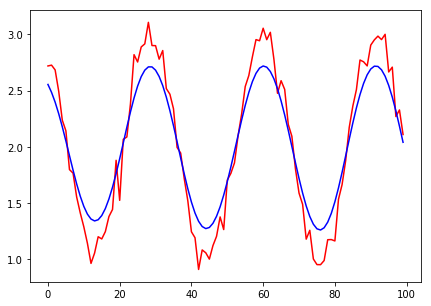

In [3]:
# construct a 31-point Gaussian filter with std 4
filt = gaussian(31, 4)
filt /= sum(filt)

# padd data on both side, apply filter
padded = concatenate((y[0]*ones(31//2), y, y[n-1]*ones(31//2)))
smooth = convolve(padded, filt, mode='valid')

# Plot the raw data together with the smoothed data: # 1) Create a figure, sized to 7x5 inches
figure(1, figsize=(7, 5))

# Plot the raw data in red
plot(y[:100], 'r')

# Plot the smoothed data in blue 
plot(smooth[:100], 'b')

#### Using Pandas for Simple Moving Average

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame({'x' : x, 'y' : y})
df_ma = df.rolling(15).mean()

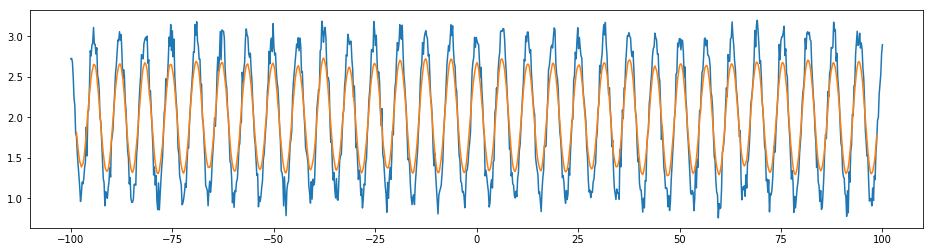

In [6]:
figure(figsize=(16, 4))
plot(df.x, df.y)
plot(df_ma.x, df_ma.y)